In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [58]:
!pip install wordcloud

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
df = pd.read_csv('googleplaystore.csv')
df.head().style.set_properties(**{"background-color": "#ff8282","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200}) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.shape

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
# colum review
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df=df.drop(df.index[10472])

In [17]:
df["Reviews"] = df["Reviews"].astype(int)

In [20]:
# columns size
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Dapat dilihat bahwa data memiliki awalan metrik (Kilo dan Mega) bersama dengan string lain. Mengganti k dan M dengan nilainya untuk mengonversi nilai ke numerik.

In [21]:
# Hapus semua karakter dari kolom size dan ubah menjadi float
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
5            5.6
6        19000.0
7        29000.0
8        33000.0
9            3.1
10       28000.0
11       12000.0
12       20000.0
13       21000.0
14       37000.0
15           2.7
16           5.5
17       17000.0
18       39000.0
19       31000.0
20       14000.0
21       12000.0
22           4.2
23           7.0
24       23000.0
25           6.0
26       25000.0
27           6.1
28           4.6
29           4.2
          ...   
10811        3.9
10812    13000.0
10813        2.7
10814    31000.0
10815        4.9
10816        6.8
10817        8.0
10818        1.5
10819        3.6
10820        8.6
10821        2.5
10822        3.1
10823        2.9
10824    82000.0
10825        7.7
10826        NaN
10827    13000.0
10828    13000.0
10829        7.4
10830        2.3
10831        9.8
10832      582.0
10833      619.0
10834        2.6
10835        9.6
10836    53000.0
10837        3.6
10838        9

In [22]:
# convert mega to kilo and conver all to mega
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.000
1        14.000
2         8.700
3        25.000
4         2.800
5         5.600
6        19.000
7        29.000
8        33.000
9         3.100
10       28.000
11       12.000
12       20.000
13       21.000
14       37.000
15        2.700
16        5.500
17       17.000
18       39.000
19       31.000
20       14.000
21       12.000
22        4.200
23        7.000
24       23.000
25        6.000
26       25.000
27        6.100
28        4.600
29        4.200
          ...  
10811     3.900
10812    13.000
10813     2.700
10814    31.000
10815     4.900
10816     6.800
10817     8.000
10818     1.500
10819     3.600
10820     8.600
10821     2.500
10822     3.100
10823     2.900
10824    82.000
10825     7.700
10826       NaN
10827    13.000
10828    13.000
10829     7.400
10830     2.300
10831     9.800
10832     0.582
10833     0.619
10834     2.600
10835     9.600
10836    53.000
10837     3.600
10838     9.500
10839       NaN
10840    19.000
Name: Size, Length: 1084

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int32
Size              9145 non-null float64
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), int32(1), object(10)
memory usage: 719.8+ KB


In [25]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [26]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [27]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
df['Installs'] = df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int32
Size              9145 non-null float64
Installs          10840 non-null int32
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(3), int32(2), object(8)
memory usage: 762.2+ KB


In [30]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
6       2018-04-26
7       2018-06-14
8       2017-09-20
9       2018-07-03
10      2017-10-27
11      2018-07-31
12      2018-04-02
13      2018-06-26
14      2018-08-03
15      2018-06-06
16      2018-07-31
17      2017-11-07
18      2018-08-03
19      2018-07-30
20      2018-04-20
21      2018-03-20
22      2018-07-12
23      2018-03-07
24      2018-07-07
25      2018-04-25
26      2017-10-11
27      2018-03-21
28      2018-07-12
29      2017-08-22
           ...    
10811   2018-07-24
10812   2018-06-13
10813   2018-07-17
10814   2015-06-03
10815   2018-07-19
10816   2018-08-06
10817   2015-10-30
10818   2016-05-19
10819   2017-08-05
10820   2018-06-27
10821   2018-05-29
10822   2017-12-01
10823   2018-04-22
10824   2018-07-31
10825   2018-02-02
10826   2018-03-23
10827   2018-06-13
10828   2017-05-15
10829   2016-06-19
10830   2014-01-20
10831   2018-06-13
10832   2014

In [31]:
# make a new columns from kolom last updated
df['Updated_Day']=df['Last Updated'].dt.day
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [32]:
df.drop('Last Updated', axis=1, inplace=True)

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


# Data Cleaning

In [34]:
totaldata = df.isnull().sum().sort_values(ascending=False)
presentasedata = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

datahilang = pd.concat([totaldata, presentasedata], axis=1, keys=['Total', 'Percent'])
datahilang

,Total,Percent
Size,1695,0.156365
Rating,1474,0.135978
Current Ver,8,0.000738
Android Ver,2,0.000185
Type,1,0.000092
Updated_Year,0,0.000000
Updated_Month,0,0.000000
Updated_Day,0,0.000000
Genres,0,0.000000
Content Rating,0,0.000000


In [36]:
# Saya Bersihkan nilai yang hilang menggunakan Imputasi Nilai Acak Karena Ini cara terbaik untuk mempertahankan distribusi 
# Untuk setiap fitur.
def Random_value_imputation(feature):
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum())               
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [37]:
for col in df:
    Random_value_imputation(col)

In [38]:
totaldata = df.isnull().sum().sort_values(ascending=False)
presentasedata = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

datahilang = pd.concat([totaldata, presentasedata], axis=1, keys=['Total', 'Percent'])
datahilang

,Total,Percent
Updated_Year,0,0.0
Updated_Month,0,0.0
Updated_Day,0,0.0
Android Ver,0,0.0
Current Ver,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0
Type,0,0.0
Installs,0,0.0


In [39]:
# menghilangkan data duplicated
duplicate = df.duplicated()
print(duplicate.sum())

308


In [40]:
df.drop_duplicates(inplace=True)

# Ekstrak data numerik dan data kategorik

In [45]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Day',
 'Updated_Month',
 'Updated_Year']

In [46]:
num_data = df[num_features]
num_data.head()

,Rating,Reviews,Size,Installs,Price,Updated_Day,Updated_Month,Updated_Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


In [48]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [49]:
categorical=df[cat_features]
categorical.head()

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [41]:
# Check Data Outlier
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [42]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [50]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating yes
Rating no
Reviews yes
Reviews no
Size no
Installs yes
Installs no
Price yes
Price no
Updated_Day no
Updated_Month no
Updated_Year yes
Updated_Year no


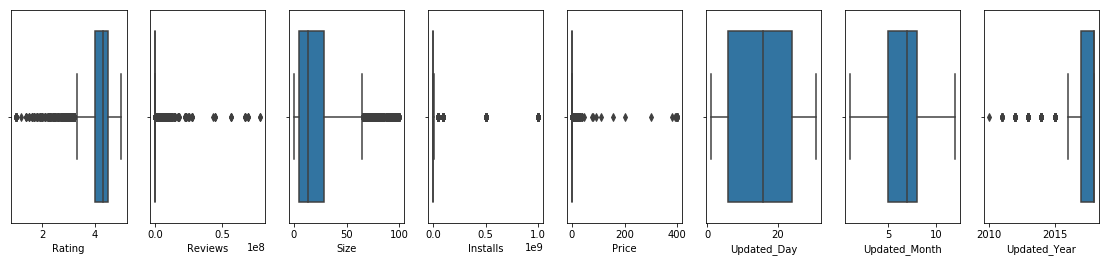

In [51]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [52]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [53]:
replace_with_thresholds(num_data, num_data.columns)

for col in num_data.columns:
    has_outliers(num_data, col)

D:\anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Rating no
Reviews no
Size no
Installs no
Price no
Updated_Day no
Updated_Month no
Updated_Year no


D:\anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Exploratory Data Analyst

In [54]:
categorical['Category'].value_counts()

FAMILY                 1946
GAME                   1129
TOOLS                   843
BUSINESS                439
PRODUCTIVITY            419
MEDICAL                 416
PERSONALIZATION         391
COMMUNICATION           382
LIFESTYLE               375
SPORTS                  369
FINANCE                 362
PHOTOGRAPHY             324
HEALTH_AND_FITNESS      317
SOCIAL                  288
NEWS_AND_MAGAZINES      276
TRAVEL_AND_LOCAL        245
SHOPPING                240
BOOKS_AND_REFERENCE     230
DATING                  201
VIDEO_PLAYERS           175
EDUCATION               141
MAPS_AND_NAVIGATION     137
ENTERTAINMENT           126
FOOD_AND_DRINK          125
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
HOUSE_AND_HOME           82
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

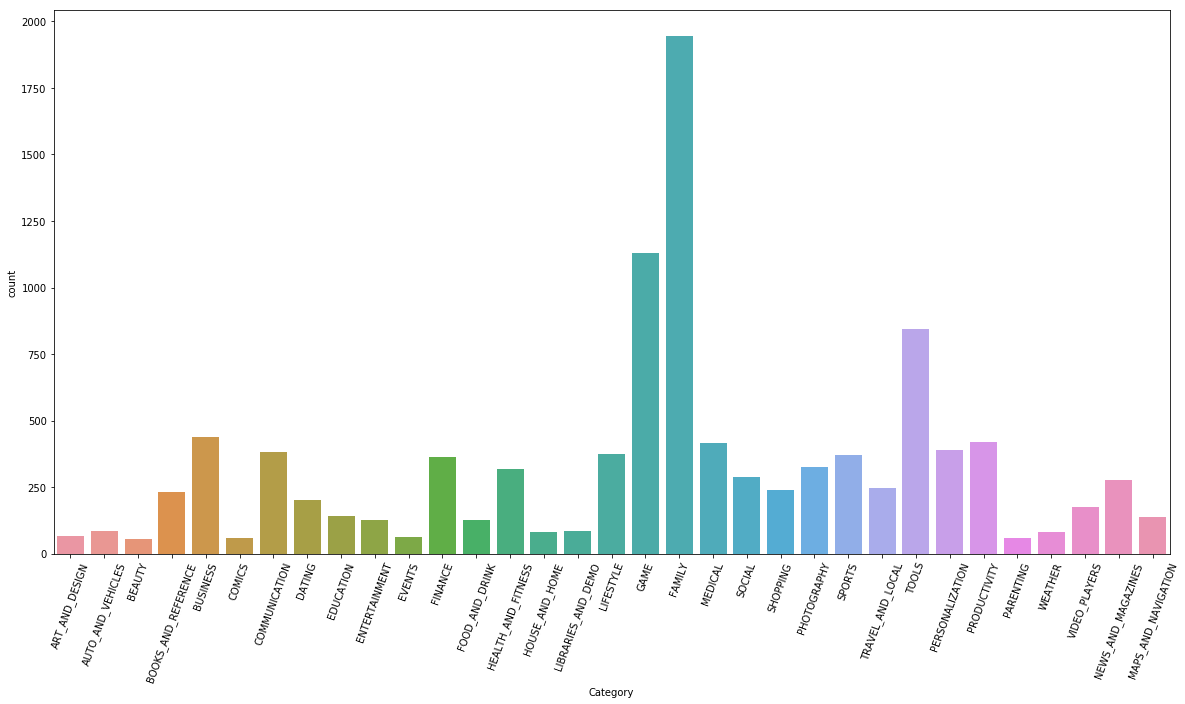

In [56]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70)

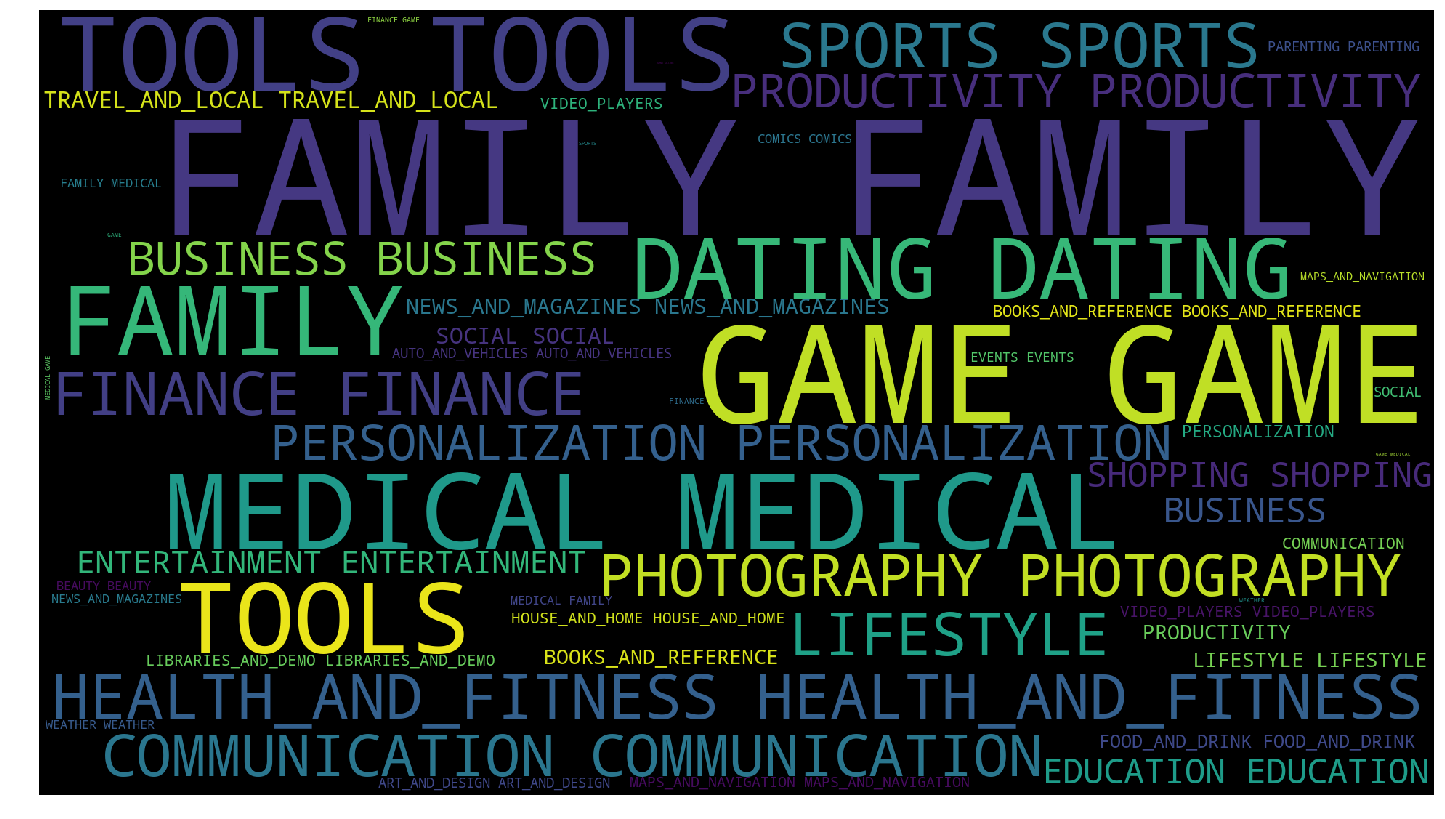

In [61]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [64]:
Category1 = df[df.Category=="GAME"].Rating
Category2 = df[df.Category=="FAMILY"].Rating
Category3 = df[df.Category=="TOOLS"].Rating

fig = go.Figure()
fig.add_trace(go.Box(x=Category1, name='GAME'))
fig.add_trace(go.Box(x=Category2, name='FAMILY'))
fig.add_trace(go.Box(x=Category3, name='TOOLS'))

fig.show()

NameError: name 'go' is not defined